# Section 1: Classical vs Quantum Bits

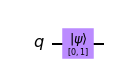

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0, 1]  # Define the initial state as |1>
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
qc.draw(output="mpl")

In [2]:
backend = Aer.get_backend("statevector_simulator") # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state= result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


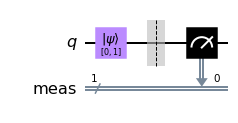

In [3]:
qc.measure_all()
qc.draw(output='mpl')

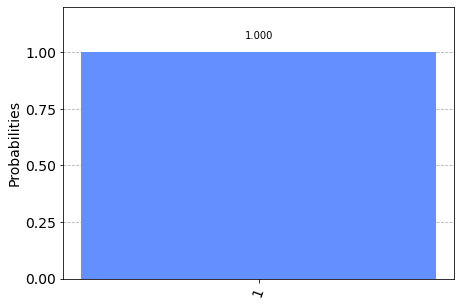

In [4]:
counts = result.get_counts()
plot_histogram(counts)

In [5]:
qc1 = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc1.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc1,backend).result().get_statevector() # Execute the circuit
print(state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


Note that no measurement should be performed before getting the counts. Otherwise, the state will collapse to one of the basis states and the probabilities will be 1 for the |0> state or for the |1> state.

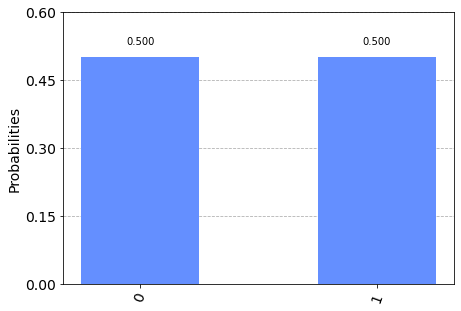

In [6]:
counts = execute(qc1,backend).result().get_counts()
plot_histogram(counts)

# Section 2: The Rules of Measurement

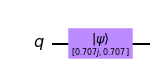

In [7]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw(output = "mpl")

In [8]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


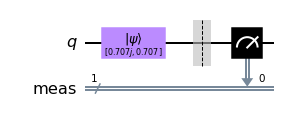

In [9]:
qc.measure_all()
qc.draw(output='mpl')

In [10]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


# Section 3: The Bloch Sphere

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


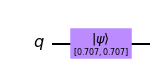

In [14]:
circuit = QuantumCircuit(1)
initial_state = [1/sqrt(2)+0.j,1/sqrt(2)+0.j]
circuit.initialize(initial_state, 0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
circuit.draw(output="mpl")

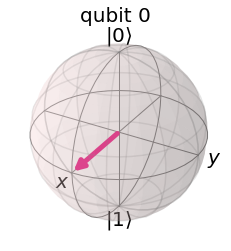

In [15]:
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)